In [5]:
import os
import tqdm
from random import shuffle
import matplotlib.pyplot as plt
import pickle
import numpy as np
import cv2

In [2]:
datadir=r'C:\Users\new\AJ_PROJECT\data\train'
types=['benign','malignant']
# Benign:-non-cancerous
#Malignant:-cancerous

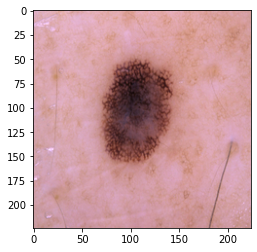

In [3]:
for t in types:
    path=os.path.join(datadir,t) #path for Benign and malignant
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_array)

[[[222 175 193]
  [223 177 188]
  [223 177 190]
  ...
  [212 156 155]
  [209 153 152]
  [208 153 150]]

 [[221 171 196]
  [220 175 196]
  [219 172 192]
  ...
  [208 153 150]
  [211 155 154]
  [214 155 161]]

 [[223 174 193]
  [225 177 199]
  [221 174 192]
  ...
  [212 156 155]
  [212 158 158]
  [212 156 155]]

 ...

 [[196 152 153]
  [201 155 158]
  [199 152 160]
  ...
  [195 144 140]
  [198 147 146]
  [200 147 153]]

 [[198 149 152]
  [200 151 154]
  [198 151 157]
  ...
  [197 142 145]
  [199 149 148]
  [201 148 154]]

 [[198 149 152]
  [199 148 155]
  [197 150 156]
  ...
  [191 142 138]
  [195 143 145]
  [198 145 151]]]


In [5]:
print(img_array.shape)

(224, 224, 3)


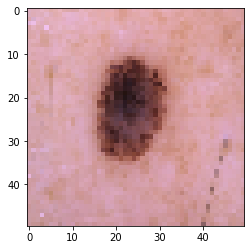

In [9]:
# Reshaping the images
size=50
new_array=cv2.resize(img_array,(size,size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [10]:
#Creating training data
trainingdata=[]
def create_training_data():
    for t in types:
        path=os.path.join(datadir,t)
        class_num=types.index(t)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array=cv2.resize(img_array,(size,size))
                trainingdata.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [13]:
print(trainingdata)

[[array([[[221, 174, 193],
        [222, 173, 185],
        [223, 174, 187],
        ...,
        [218, 159, 162],
        [213, 158, 162],
        [211, 156, 154]],

       [[219, 174, 189],
        [222, 172, 182],
        [223, 175, 189],
        ...,
        [217, 160, 162],
        [215, 159, 160],
        [208, 154, 152]],

       [[220, 166, 173],
        [215, 173, 201],
        [229, 179, 204],
        ...,
        [215, 157, 153],
        [219, 162, 168],
        [211, 155, 153]],

       ...,

       [[201, 156, 162],
        [202, 155, 162],
        [203, 155, 164],
        ...,
        [201, 151, 149],
        [207, 156, 169],
        [207, 156, 163]],

       [[199, 155, 162],
        [201, 153, 157],
        [201, 156, 163],
        ...,
        [203, 150, 146],
        [203, 152, 153],
        [204, 152, 160]],

       [[199, 152, 159],
        [195, 147, 147],
        [195, 146, 146],
        ...,
        [202, 149, 146],
        [201, 149, 153],
        [196, 144, 143

In [15]:
shuffle(trainingdata)

In [16]:
for t in trainingdata[:10]:
    print(t[1])

0
0
1
0
0
1
1
0
1
0


In [17]:
x=[] # Features
y=[] # Labels for features

In [18]:
for features, label in trainingdata:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,size,size,3)

In [22]:
if os.path.exists(os.path.abspath('x.pickle')) and os.path.exists(os.path.abspath('y.pickle')):
    print('Already exists')
else:
    pickle_out=open('x.pickle','wb')
    pickle.dump(x,pickle_out)
    pickle_out.close()
    
    pickle_out=open('y.pickle','wb')
    pickle.dump(y,pickle_out)
    pickle_out.close()

Already exists


In [27]:
# Loading the pickled data
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)
print(x[1])

[[[232 169 170]
  [239 172 179]
  [238 172 179]
  ...
  [239 177 181]
  [234 170 177]
  [234 171 176]]

 [[233 167 168]
  [236 171 172]
  [238 171 171]
  ...
  [233 171 175]
  [236 171 177]
  [232 169 169]]

 [[233 166 159]
  [235 171 173]
  [237 171 175]
  ...
  [236 174 175]
  [234 174 176]
  [232 171 173]]

 ...

 [[220 163 147]
  [225 171 158]
  [227 170 158]
  ...
  [224 166 160]
  [219 161 151]
  [216 160 150]]

 [[223 166 153]
  [222 165 151]
  [226 169 158]
  ...
  [222 166 156]
  [221 162 159]
  [218 163 154]]

 [[221 162 151]
  [222 165 152]
  [222 165 154]
  ...
  [222 163 155]
  [222 165 158]
  [216 161 150]]]


In [28]:
datadir=r'C:\Users\new\AJ_PROJECT\data\test'
types=['benign','malignant']

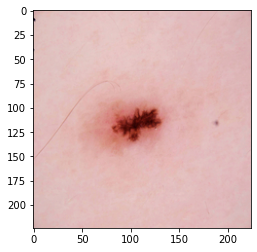

In [29]:
for t in types:
    path=os.path.join(datadir,t) #path for Benign and malignant
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

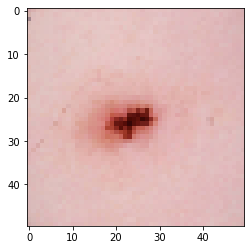

In [30]:
size=50
new_array=cv2.resize(img_array,(size,size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [37]:
#Creating training data
testingdata=[]
def create_testing_data():
    for t in types:
        path=os.path.join(datadir,t)
        class_num=types.index(t)
        for img in os.listdir(path):
            #print(path)
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array=cv2.resize(img_array,(size,size))
                #plt.imshow(new_array,cmap='gray')
                #plt.show()
                print([new_array, class_num])
                testingdata.append([new_array,class_num])
            except Exception as e:
                pass

create_testing_data()

[array([[[208, 167, 170],
        [216, 176, 174],
        [222, 186, 182],
        ...,
        [218, 178, 179],
        [217, 177, 178],
        [211, 174, 178]],

       [[211, 177, 170],
        [218, 188, 186],
        [223, 192, 189],
        ...,
        [218, 178, 181],
        [215, 174, 175],
        [214, 173, 175]],

       [[160, 134, 140],
        [222, 188, 187],
        [223, 192, 189],
        ...,
        [218, 177, 181],
        [216, 176, 177],
        [216, 176, 179]],

       ...,

       [[215, 183, 181],
        [217, 184, 181],
        [220, 183, 176],
        ...,
        [218, 180, 180],
        [215, 184, 183],
        [220, 181, 183]],

       [[209, 180, 176],
        [214, 183, 181],
        [220, 181, 181],
        ...,
        [220, 181, 182],
        [220, 180, 180],
        [214, 180, 179]],

       [[207, 172, 171],
        [212, 179, 178],
        [216, 181, 177],
        ...,
        [219, 185, 182],
        [217, 181, 181],
        [213, 176, 176]

        [210, 149, 153]]], dtype=uint8), 0]
[array([[[234, 164, 180],
        [242, 170, 186],
        [242, 167, 183],
        ...,
        [227, 147, 170],
        [218, 134, 158],
        [218, 137, 157]],

       [[236, 164, 179],
        [241, 171, 187],
        [239, 167, 182],
        ...,
        [224, 146, 166],
        [220, 142, 161],
        [221, 140, 160]],

       [[234, 162, 174],
        [232, 160, 175],
        [237, 164, 179],
        ...,
        [224, 147, 167],
        [224, 147, 166],
        [222, 148, 167]],

       ...,

       [[214, 154, 155],
        [221, 157, 162],
        [220, 158, 163],
        ...,
        [226, 165, 170],
        [222, 162, 168],
        [213, 152, 157]],

       [[216, 155, 159],
        [219, 157, 158],
        [220, 158, 163],
        ...,
        [220, 160, 162],
        [218, 159, 162],
        [216, 155, 162]],

       [[221, 158, 162],
        [219, 154, 152],
        [218, 156, 154],
        ...,
        [219, 160, 161],
    

        [221, 199, 208]]], dtype=uint8), 0]
[array([[[180, 150, 155],
        [182, 150, 155],
        [185, 154, 159],
        ...,
        [180, 155, 155],
        [179, 156, 154],
        [180, 153, 150]],

       [[181, 149, 151],
        [181, 152, 157],
        [180, 150, 153],
        ...,
        [176, 153, 147],
        [177, 152, 148],
        [179, 151, 145]],

       [[182, 153, 159],
        [185, 154, 166],
        [185, 154, 165],
        ...,
        [177, 154, 148],
        [178, 153, 148],
        [179, 152, 143]],

       ...,

       [[182, 155, 162],
        [180, 156, 158],
        [181, 156, 160],
        ...,
        [180, 153, 145],
        [183, 155, 150],
        [182, 153, 145]],

       [[179, 153, 157],
        [179, 154, 158],
        [179, 154, 162],
        ...,
        [180, 153, 142],
        [182, 153, 146],
        [180, 152, 142]],

       [[177, 153, 154],
        [180, 154, 158],
        [181, 156, 160],
        ...,
        [180, 152, 143],
    

        [150, 125, 119]]], dtype=uint8), 0]
[array([[[175, 134, 174],
        [180, 141, 181],
        [179, 138, 178],
        ...,
        [186, 146, 174],
        [188, 145, 169],
        [189, 144, 166]],

       [[176, 137, 180],
        [178, 130, 177],
        [178, 136, 179],
        ...,
        [191, 149, 181],
        [187, 143, 170],
        [190, 145, 171]],

       [[175, 129, 172],
        [175, 136, 175],
        [177, 135, 174],
        ...,
        [195, 146, 182],
        [191, 150, 182],
        [191, 142, 170]],

       ...,

       [[167, 123, 145],
        [168, 122, 146],
        [176, 132, 159],
        ...,
        [193, 139, 166],
        [179, 126, 150],
        [153, 112, 134]],

       [[159, 112, 137],
        [166, 111, 141],
        [167, 121, 150],
        ...,
        [184, 129, 154],
        [163, 113, 137],
        [134,  92, 112]],

       [[145,  91, 124],
        [164, 117, 150],
        [169, 123, 153],
        ...,
        [175, 125, 147],
    

        [206, 147, 167]]], dtype=uint8), 0]
[array([[[125,  70,  76],
        [122,  66,  72],
        [130,  78,  85],
        ...,
        [159, 115, 116],
        [153, 109, 111],
        [159, 118, 125]],

       [[122,  65,  71],
        [127,  72,  78],
        [140,  90, 102],
        ...,
        [163, 112, 113],
        [158, 114, 122],
        [156, 113, 120]],

       [[124,  67,  73],
        [125,  70,  75],
        [142,  92, 104],
        ...,
        [157, 108, 113],
        [158, 113, 115],
        [161, 120, 127]],

       ...,

       [[120,  63,  72],
        [132,  73,  86],
        [140,  83, 100],
        ...,
        [156, 106, 110],
        [152, 101, 109],
        [145,  95, 100]],

       [[112,  53,  60],
        [133,  76,  91],
        [138,  81,  99],
        ...,
        [156, 110, 118],
        [155, 104, 113],
        [146,  98, 108]],

       [[126,  73,  91],
        [133,  76,  93],
        [135,  77,  97],
        ...,
        [150,  99, 105],
    

        [190, 119, 129]]], dtype=uint8), 0]
[array([[[193,  85, 107],
        [197,  87, 105],
        [199,  90, 108],
        ...,
        [218, 112, 133],
        [213, 108, 129],
        [215, 110, 124]],

       [[196,  90, 110],
        [199,  93, 113],
        [202,  95, 118],
        ...,
        [217, 119, 137],
        [213, 109, 126],
        [213, 111, 128]],

       [[194,  82, 104],
        [202,  94, 117],
        [205,  99, 126],
        ...,
        [215, 116, 130],
        [210, 108, 117],
        [209, 108, 121]],

       ...,

       [[196, 104, 106],
        [195, 101, 101],
        [196, 104, 104],
        ...,
        [199, 107, 119],
        [198, 107, 116],
        [195, 107, 114]],

       [[195, 105, 109],
        [195, 101, 105],
        [198, 104, 102],
        ...,
        [200, 103, 111],
        [195, 100, 102],
        [194,  99, 106]],

       [[199, 110, 111],
        [198, 110, 110],
        [195, 106, 100],
        ...,
        [195, 100, 103],
    

        [222, 158, 156]]], dtype=uint8), 0]
[array([[[219, 133, 146],
        [221, 133, 149],
        [219, 131, 148],
        ...,
        [227, 147, 168],
        [224, 145, 165],
        [219, 141, 159]],

       [[216, 131, 146],
        [221, 135, 149],
        [221, 135, 150],
        ...,
        [225, 150, 169],
        [220, 145, 165],
        [217, 138, 159]],

       [[219, 133, 154],
        [220, 133, 149],
        [219, 135, 154],
        ...,
        [226, 149, 166],
        [223, 149, 167],
        [220, 147, 163]],

       ...,

       [[209, 140, 150],
        [211, 144, 153],
        [215, 148, 155],
        ...,
        [210, 147, 152],
        [206, 141, 149],
        [205, 142, 151]],

       [[213, 151, 156],
        [213, 143, 153],
        [215, 146, 154],
        ...,
        [213, 150, 157],
        [206, 145, 152],
        [204, 143, 150]],

       [[212, 148, 150],
        [213, 143, 151],
        [213, 141, 151],
        ...,
        [204, 141, 146],
    

        [229, 168, 175]]], dtype=uint8), 0]
[array([[[187, 117, 127],
        [213, 134, 142],
        [212, 129, 145],
        ...,
        [218, 137, 150],
        [206, 133, 139],
        [215, 138, 149]],

       [[209, 130, 138],
        [207, 125, 138],
        [209, 125, 141],
        ...,
        [217, 143, 155],
        [215, 138, 147],
        [201, 128, 129]],

       [[208, 130, 135],
        [209, 122, 138],
        [211, 124, 140],
        ...,
        [213, 140, 147],
        [214, 138, 147],
        [213, 141, 148]],

       ...,

       [[198, 132, 123],
        [197, 128, 125],
        [197, 131, 122],
        ...,
        [197, 137, 138],
        [197, 133, 127],
        [200, 141, 136]],

       [[196, 127, 119],
        [192, 122, 111],
        [194, 124, 117],
        ...,
        [204, 144, 144],
        [200, 140, 135],
        [201, 141, 138]],

       [[194, 126, 117],
        [193, 126, 119],
        [192, 122, 114],
        ...,
        [204, 143, 139],
    

        [200, 125, 135]]], dtype=uint8), 0]
[array([[[ 35,  24,  26],
        [ 37,  26,  29],
        [ 66,  50,  54],
        ...,
        [ 76,  55,  56],
        [ 49,  35,  40],
        [ 44,  31,  35]],

       [[ 33,  23,  24],
        [ 52,  39,  44],
        [ 89,  73,  76],
        ...,
        [ 91,  64,  59],
        [ 64,  44,  47],
        [ 43,  31,  35]],

       [[ 38,  27,  31],
        [ 72,  58,  59],
        [109,  96,  99],
        ...,
        [103,  77,  63],
        [ 78,  55,  53],
        [ 51,  37,  38]],

       ...,

       [[ 46,  31,  38],
        [ 51,  38,  43],
        [ 82,  66,  66],
        ...,
        [ 59,  44,  40],
        [ 35,  25,  26],
        [ 30,  19,  24]],

       [[ 49,  32,  38],
        [ 41,  28,  35],
        [ 61,  46,  46],
        ...,
        [ 40,  29,  28],
        [ 28,  17,  23],
        [ 33,  21,  23]],

       [[ 51,  35,  40],
        [ 45,  31,  37],
        [ 44,  32,  39],
        ...,
        [ 31,  20,  24],
    

        [223, 173, 201]]], dtype=uint8), 0]
[array([[[207, 100, 131],
        [208, 100, 131],
        [209, 102, 139],
        ...,
        [212, 123, 148],
        [211, 119, 145],
        [208, 118, 139]],

       [[206, 102, 130],
        [207, 103, 133],
        [206,  99, 133],
        ...,
        [214, 126, 151],
        [212, 127, 151],
        [209, 121, 145]],

       [[208, 107, 136],
        [207, 106, 135],
        [206, 100, 129],
        ...,
        [216, 126, 151],
        [213, 125, 148],
        [209, 123, 146]],

       ...,

       [[199, 118, 128],
        [196, 111, 122],
        [194, 105, 114],
        ...,
        [195, 104, 107],
        [176,  77,  74],
        [169,  91,  93]],

       [[191, 109, 121],
        [196, 113, 119],
        [195, 104, 115],
        ...,
        [180,  89,  82],
        [172,  69,  67],
        [177,  88,  86]],

       [[195, 107, 117],
        [197, 109, 121],
        [196, 105, 117],
        ...,
        [175,  72,  68],
    

        [228, 188, 185]]], dtype=uint8), 0]
[array([[[ 28,  19,  19],
        [ 79,  59,  57],
        [116,  92,  83],
        ...,
        [ 41,  23,  24],
        [ 43,  24,  23],
        [ 49,  30,  25]],

       [[ 55,  38,  38],
        [104,  79,  71],
        [139, 110, 103],
        ...,
        [ 38,  23,  23],
        [ 39,  23,  22],
        [ 45,  27,  21]],

       [[ 83,  61,  56],
        [126,  98,  94],
        [153, 120, 112],
        ...,
        [ 47,  34,  33],
        [ 40,  25,  23],
        [ 40,  24,  21]],

       ...,

       [[ 54,  35,  36],
        [ 91,  67,  65],
        [127,  98,  94],
        ...,
        [ 14,   5,   3],
        [ 12,   2,   1],
        [ 12,   3,   2]],

       [[ 44,  28,  28],
        [ 65,  45,  46],
        [102,  71,  68],
        ...,
        [ 13,   2,   1],
        [ 13,   2,   1],
        [ 13,   2,   1]],

       [[ 45,  29,  28],
        [ 48,  29,  31],
        [ 78,  54,  53],
        ...,
        [ 14,   3,   2],
    

        [ 7,  3,  9]]], dtype=uint8), 1]
[array([[[194, 149, 143],
        [197, 150, 137],
        [197, 151, 149],
        ...,
        [182, 122, 122],
        [178, 119, 118],
        [182, 118, 119]],

       [[191, 144, 137],
        [193, 149, 133],
        [198, 153, 149],
        ...,
        [184, 119, 116],
        [180, 120, 120],
        [182, 119, 122]],

       [[190, 143, 127],
        [192, 145, 128],
        [196, 148, 134],
        ...,
        [182, 119, 120],
        [184, 121, 121],
        [184, 123, 124]],

       ...,

       [[187, 144, 132],
        [198, 151, 150],
        [192, 145, 139],
        ...,
        [177, 110, 112],
        [178, 113, 114],
        [179, 119, 119]],

       [[196, 154, 152],
        [194, 155, 156],
        [195, 148, 135],
        ...,
        [179, 111, 112],
        [178, 115, 117],
        [178, 121, 124]],

       [[192, 151, 150],
        [193, 146, 139],
        [184, 134, 117],
        ...,
        [179, 114, 116],
       

        [234, 199, 195]]], dtype=uint8), 1]
[array([[[100,  81,  98],
        [122, 106, 122],
        [142, 125, 142],
        ...,
        [133, 112, 117],
        [119,  98, 107],
        [100,  80,  85]],

       [[113,  96, 107],
        [134, 118, 129],
        [146, 128, 147],
        ...,
        [140, 113, 124],
        [127, 107, 116],
        [110,  91,  97]],

       [[123, 110, 120],
        [140, 122, 138],
        [148, 131, 149],
        ...,
        [140, 114, 125],
        [134, 113, 122],
        [118,  95, 105]],

       ...,

       [[ 68,  56,  65],
        [ 94,  81,  95],
        [107,  90, 101],
        ...,
        [ 96,  73,  77],
        [ 74,  58,  63],
        [ 53,  40,  48]],

       [[ 54,  42,  54],
        [ 79,  66,  77],
        [100,  88,  98],
        ...,
        [ 82,  62,  69],
        [ 61,  48,  56],
        [ 42,  31,  37]],

       [[ 41,  30,  40],
        [ 63,  52,  61],
        [ 83,  72,  80],
        ...,
        [ 67,  52,  58],
    

        [165, 107,  88]]], dtype=uint8), 1]
[array([[[148, 121, 135],
        [146, 118, 132],
        [140, 108, 114],
        ...,
        [144, 112, 126],
        [140, 108, 117],
        [142, 112, 122]],

       [[149, 122, 137],
        [148, 116, 130],
        [146, 115, 128],
        ...,
        [144, 112, 127],
        [139, 106, 112],
        [140, 110, 119]],

       [[149, 122, 135],
        [148, 116, 130],
        [151, 120, 135],
        ...,
        [145, 114, 120],
        [145, 114, 124],
        [141, 111, 119]],

       ...,

       [[132,  99, 106],
        [133, 101, 107],
        [134, 103, 108],
        ...,
        [154, 131, 146],
        [147, 119, 134],
        [141, 113, 127]],

       [[137, 104, 113],
        [138, 106, 116],
        [140, 109, 117],
        ...,
        [147, 125, 138],
        [144, 117, 132],
        [143, 116, 131]],

       [[131, 101, 107],
        [137, 107, 115],
        [135, 104, 115],
        ...,
        [144, 112, 128],
    

        [0, 0, 0]]], dtype=uint8), 1]
[array([[[10,  5, 10],
        [18,  9, 15],
        [25, 15, 20],
        ...,
        [64, 47, 53],
        [25, 16, 23],
        [12,  7, 10]],

       [[14,  8, 13],
        [24, 13, 19],
        [32, 20, 29],
        ...,
        [78, 57, 62],
        [47, 32, 37],
        [16,  8, 15]],

       [[19, 11, 18],
        [26, 15, 20],
        [56, 38, 49],
        ...,
        [90, 69, 76],
        [66, 47, 53],
        [32, 21, 27]],

       ...,

       [[11,  7, 14],
        [18, 11, 18],
        [48, 33, 48],
        ...,
        [86, 59, 73],
        [66, 43, 51],
        [43, 25, 34]],

       [[ 8,  5,  9],
        [14,  8, 14],
        [28, 17, 27],
        ...,
        [75, 52, 63],
        [51, 34, 41],
        [29, 18, 26]],

       [[ 4,  4,  6],
        [11,  6, 11],
        [18,  9, 14],
        ...,
        [64, 40, 50],
        [39, 22, 29],
        [26, 15, 24]]], dtype=uint8), 1]
[array([[[133, 133, 128],
        [131, 128, 123]

        [199, 132,  91]]], dtype=uint8), 1]
[array([[[235, 146, 116],
        [237, 141, 108],
        [235, 137, 102],
        ...,
        [231, 158, 123],
        [227, 151, 111],
        [225, 151, 116]],

       [[231, 138, 108],
        [232, 137, 105],
        [237, 142, 111],
        ...,
        [225, 149, 113],
        [226, 152, 117],
        [230, 156, 124]],

       [[229, 137, 112],
        [238, 143, 110],
        [236, 136, 104],
        ...,
        [234, 156, 123],
        [228, 149, 112],
        [228, 155, 121]],

       ...,

       [[221, 125,  78],
        [231, 137,  93],
        [230, 136,  94],
        ...,
        [230, 156, 124],
        [221, 146, 113],
        [218, 145, 112]],

       [[230, 137,  94],
        [227, 132,  85],
        [224, 129,  80],
        ...,
        [235, 162, 130],
        [227, 152, 116],
        [219, 146, 111]],

       [[210, 121,  73],
        [234, 142, 101],
        [228, 131,  87],
        ...,
        [219, 141, 102],
    

        [ 27,  28,  33]]], dtype=uint8), 1]
[array([[[ 45,  45,  51],
        [ 57,  51,  54],
        [173, 151, 140],
        ...,
        [189, 172, 165],
        [178, 160, 151],
        [128, 133, 142]],

       [[ 47,  46,  51],
        [172, 149, 136],
        [185, 162, 148],
        ...,
        [191, 168, 154],
        [184, 165, 154],
        [165, 151, 145]],

       [[ 42,  39,  47],
        [181, 160, 147],
        [186, 160, 144],
        ...,
        [197, 178, 168],
        [189, 165, 152],
        [179, 166, 162]],

       ...,

       [[178, 194, 217],
        [149, 118, 114],
        [160, 106,  80],
        ...,
        [190, 166, 157],
        [185, 167, 159],
        [168, 149, 142]],

       [[ 60,  60,  75],
        [ 68,  54,  55],
        [153, 103,  89],
        ...,
        [185, 163, 150],
        [181, 162, 158],
        [ 88,  78,  74]],

       [[ 51,  49,  60],
        [ 46,  45,  52],
        [139,  98,  96],
        ...,
        [184, 161, 155],
    

        [134, 132, 123]]], dtype=uint8), 1]
[array([[[177, 141, 151],
        [178, 141, 153],
        [183, 150, 158],
        ...,
        [144, 112, 128],
        [145, 111, 128],
        [138, 105, 121]],

       [[175, 140, 148],
        [175, 138, 148],
        [181, 147, 155],
        ...,
        [148, 113, 126],
        [144, 114, 131],
        [139, 110, 128]],

       [[176, 142, 151],
        [181, 142, 151],
        [178, 141, 152],
        ...,
        [146, 118, 132],
        [147, 118, 135],
        [143, 113, 129]],

       ...,

       [[169, 137, 148],
        [169, 132, 150],
        [171, 136, 155],
        ...,
        [129,  87,  91],
        [124,  81,  88],
        [123,  82,  83]],

       [[173, 139, 153],
        [174, 141, 154],
        [175, 140, 160],
        ...,
        [129,  87,  89],
        [119,  76,  78],
        [115,  74,  74]],

       [[170, 137, 154],
        [172, 141, 157],
        [166, 131, 150],
        ...,
        [136,  97, 105],
    

In [38]:
print(testingdata)

[[array([[[208, 167, 170],
        [216, 176, 174],
        [222, 186, 182],
        ...,
        [218, 178, 179],
        [217, 177, 178],
        [211, 174, 178]],

       [[211, 177, 170],
        [218, 188, 186],
        [223, 192, 189],
        ...,
        [218, 178, 181],
        [215, 174, 175],
        [214, 173, 175]],

       [[160, 134, 140],
        [222, 188, 187],
        [223, 192, 189],
        ...,
        [218, 177, 181],
        [216, 176, 177],
        [216, 176, 179]],

       ...,

       [[215, 183, 181],
        [217, 184, 181],
        [220, 183, 176],
        ...,
        [218, 180, 180],
        [215, 184, 183],
        [220, 181, 183]],

       [[209, 180, 176],
        [214, 183, 181],
        [220, 181, 181],
        ...,
        [220, 181, 182],
        [220, 180, 180],
        [214, 180, 179]],

       [[207, 172, 171],
        [212, 179, 178],
        [216, 181, 177],
        ...,
        [219, 185, 182],
        [217, 181, 181],
        [213, 176, 176

In [39]:
x_test=[] # Features
y_test=[] # Labels for features

In [42]:
for features, label in testingdata:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,size,size,3)

In [49]:
if os.path.exists(os.path.abspath('xtest.pickle')) and os.path.exists(os.path.abspath('ytest.pickle')):
    print('Already exists')
else:
    pickle_out=open('xtest.pickle','wb')
    pickle.dump(x_test,pickle_out)
    pickle_out.close()
    
    pickle_out=open('ytest.pickle','wb')
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
    print('Files created')

Already exists
